In [1]:
import pandas as pd
pd.set_option('display.max_columns', None)

In [3]:
fire_data = pd.read_csv('fire_data_nwcg_final.csv')

In [4]:
fire_data.rename(columns={'9. Longitude Degrees * -1': 'Longitude Degrees'}, inplace=True)

In [5]:
fire_data.head(1)

,Discovery Calendar Year,Fire ID,Fire Name,Unique FireID,Location,Region-Forest,District,Fire Number,Protection Agency,Ownership Origin,County at Origin,Fire Class Size,Latitude (Decimal Degrees),Longitude (Decimal Degrees),Latitude Degrees,Latitude Minutes,Latitude Seconds,Longitude Degrees,Longitude Minutes,Longitude Seconds,Ignition Date,Ignition Time,Discovery Date,Discovery Time,Statistical Fire Cause Description,General Fire Cause Description,Specific Fire Cause Description,Class People Cause Description,In Large Complex?,Acres Burned in WUI?,Escaped Fire?,Initial Action Date,Initial Action Time,Suppression Strategy Attained Date,Suppression Strategy Attained Time,Fire Out Date,Fire Out Time,Resource Type Description,FS Acres (All Forests) (Auto Total),Non-FS Acres Protected by FS (Auto Total),Non-FS Acres Not Protected by FS (Auto Total),Total Acres Burned (Auto Total),Fire Intensity Level Description,Report Weather Station,Cover Class Description,Slope Percentage,Aspect,Elevation (Feet)
0,2016,6704774,Woody,2016-NVHTF-030014,Not Listed,417,2.0,1,USFS,USFS,51,A,38.399444,-119.535833,38.0,23.0,58.0,-119.0,32.0,9.0,2016-01-13,20:29:00,2016-01-13,20:30:00,Equipment Use,Other,Exhaust-Other,Public Employee,N,N,No,2016-01-13,20:31:00,2016-01-13,22:20:00,2016-01-14,03:00:00,Suppression Person,0.1,0.0,0.0,0.1,Flame Length 0-2',43707,Mature timber,5.0,0,8500.0


### Imports 

In [6]:
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
from sklearn.feature_selection import f_classif
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, accuracy_score
import matplotlib.pyplot as plt
from sklearn.pipeline import Pipeline
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import numpy as np
from sklearn.preprocessing import LabelBinarizer
from xgboost import XGBClassifier
from sklearn.ensemble import VotingClassifier
from lightgbm import LGBMClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LinearRegression, Ridge, Lasso, ElasticNet
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from xgboost import XGBRegressor
from lightgbm import LGBMRegressor
#from catboost import CatBoostRegressor
from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsRegressor
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.decomposition import PCA

## Feature Selection

### Correlation Matrix

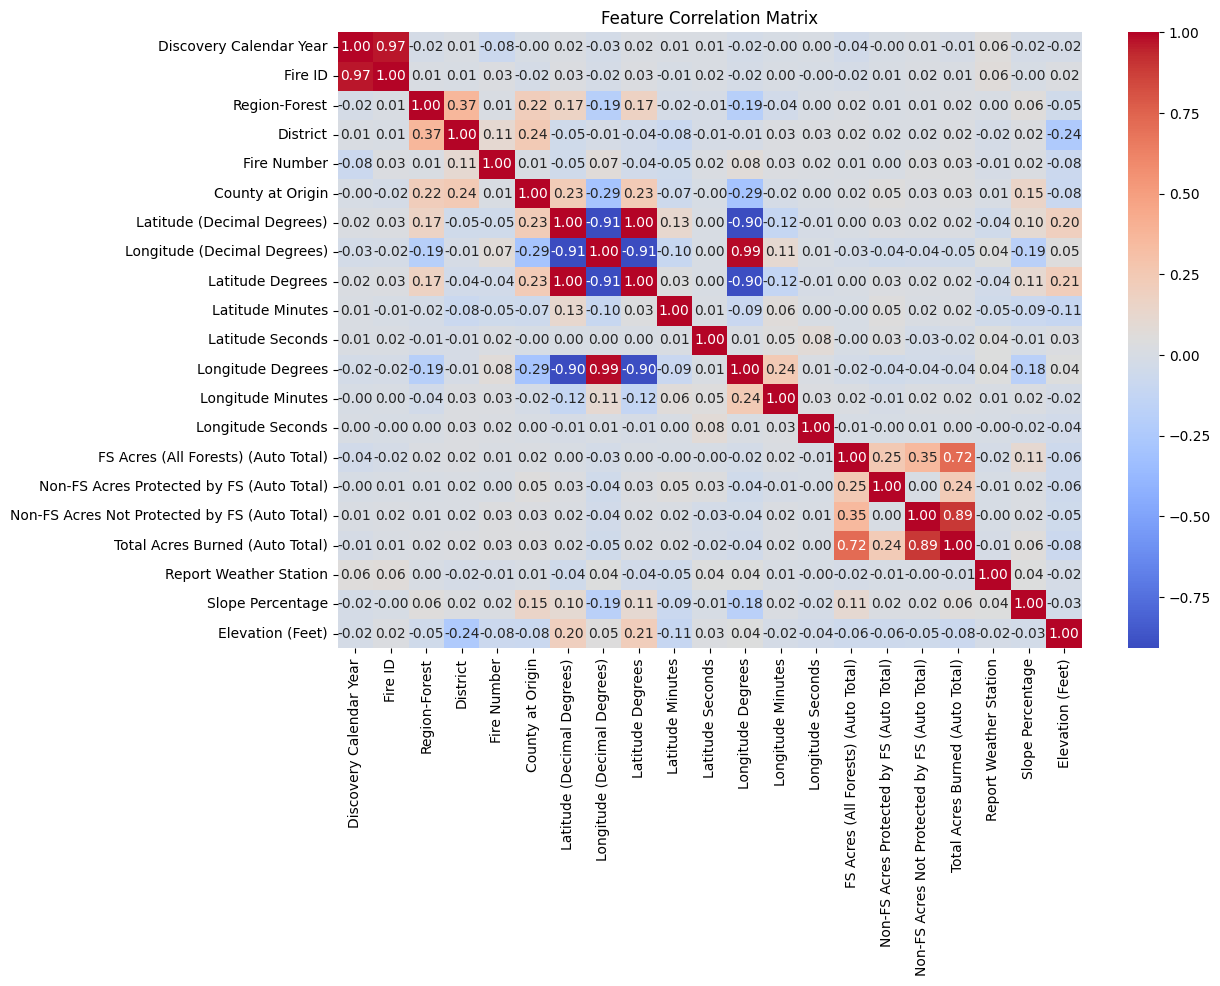

In [15]:
numerical_features = fire_data.select_dtypes(include=['float64', 'int64'])
correlation_matrix = numerical_features.corr()

plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap="coolwarm")
plt.title("Feature Correlation Matrix")
plt.show()

In [16]:
le = LabelEncoder()
fire_data['Statistical Fire Cause Description Encoded'] = le.fit_transform(fire_data['Statistical Fire Cause Description'])
y = fire_data['Statistical Fire Cause Description Encoded']
target_correlation = numerical_features.corrwith(fire_data['Statistical Fire Cause Description Encoded'])
target_correlation.sort_values(ascending=False)

Slope Percentage                                 0.074433
Fire Number                                      0.053722
District                                         0.038491
Total Acres Burned (Auto Total)                  0.027979
Non-FS Acres Not Protected by FS (Auto Total)    0.027856
Longitude (Decimal Degrees)                      0.026354
Longitude Degrees                                0.025526
Fire ID                                          0.024960
Latitude Minutes                                 0.024790
Non-FS Acres Protected by FS (Auto Total)        0.024504
Discovery Calendar Year                          0.014574
FS Acres (All Forests) (Auto Total)              0.009569
Elevation (Feet)                                 0.006772
Latitude Seconds                                 0.003123
Longitude Minutes                               -0.000642
Latitude (Decimal Degrees)                      -0.001809
Latitude Degrees                                -0.004091
Report Weather

### ANOVA F-Values

Elevation (Feet)                                 416.180463
Latitude Degrees                                 411.206694
Latitude (Decimal Degrees)                       398.487725
Longitude (Decimal Degrees)                      225.491748
Longitude Degrees                                217.865695
Slope Percentage                                  71.473375
Fire Number                                       52.564309
County at Origin                                  32.291973
District                                          19.012194
Discovery Calendar Year                           18.440648
Fire ID                                           17.580354
Region-Forest                                     12.745716
Latitude Minutes                                  12.139321
Longitude Minutes                                 10.349921
Non-FS Acres Protected by FS (Auto Total)          9.536395
Total Acres Burned (Auto Total)                    5.370140
Longitude Seconds                       

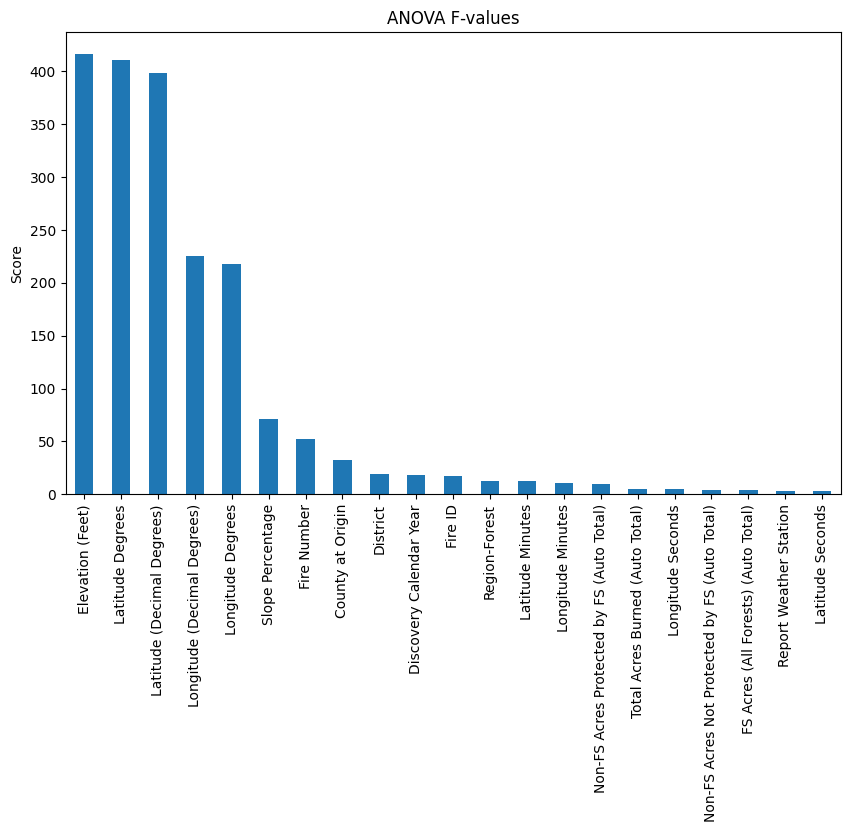

In [17]:
f_values, p_values = f_classif(numerical_features, y)

f_scores = pd.Series(f_values, index=numerical_features.columns)
f_scores = f_scores.sort_values(ascending=False)
print(f_scores)

f_scores.plot(kind='bar', figsize=(10, 6), title='ANOVA F-values')
plt.ylabel('Score')
plt.show()


## Random Forest Classification <br>
Just regular RF performed the best

In [7]:
fire_data = pd.read_csv('fire_data_nwcg_final.csv')
fire_data.rename(columns={'9. Longitude Degrees * -1': 'Longitude Degrees'}, inplace=True)

fire_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13415 entries, 0 to 13414
Data columns (total 48 columns):
 #   Column                                         Non-Null Count  Dtype  
---  ------                                         --------------  -----  
 0   Discovery Calendar Year                        13415 non-null  int64  
 1   Fire ID                                        13415 non-null  int64  
 2   Fire Name                                      13415 non-null  object 
 3   Unique FireID                                  13415 non-null  object 
 4   Location                                       13415 non-null  object 
 5   Region-Forest                                  13415 non-null  int64  
 6   District                                       13415 non-null  float64
 7   Fire Number                                    13415 non-null  int64  
 8   Protection Agency                              13415 non-null  object 
 9   Ownership Origin                               134

In [8]:

fire_data['Burn Days'] = (pd.to_datetime(fire_data['Fire Out Date']) - pd.to_datetime(fire_data['Ignition Date'])).dt.days



### Regular RF

In [26]:
target_column = "Statistical Fire Cause Description"
exclude_columns = ["Fire ID", "Unique FireID",'Discovery Time', 'General Fire Cause Description', 'Ignition Time', 'Specific Fire Cause Description',
       'Class People Cause Description', "Specific Fire Cause Description", "Initial Action Time", "Fire Name",
                   "Suppression Strategy Attained Time", "Fire Out Time", target_column]
X = fire_data.drop(columns=exclude_columns)
y = fire_data[target_column]

numerical_features = X.select_dtypes(include=["float64", "int64"]).columns.tolist()
categorical_features = X.select_dtypes(include=["object"]).columns.tolist()

In [27]:
preprocessor = ColumnTransformer(
    transformers=[
        ("num", StandardScaler(), numerical_features),
        ("cat", OneHotEncoder(handle_unknown="ignore"), categorical_features),
    ]
)

In [28]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

In [ ]:
"""Just a note of justification for removing all these features
['Fire Name', # Id, irrelevent
 'Location', # location, deleted
 'Region-Forest', # location, deleted
 'District', # location, deleted
 'Fire Number', # Id, irrelevent
 'Latitude Degrees', # location, deleted
 'Latitude Minutes', # location, deleted
 'Latitude Seconds', # location, deleted
 'Longitude Degrees', # location, deleted
 'Longitude Minutes', # location, deleted
 'Longitude Seconds', # location, deleted
 'Acres Burned in WUI?', # acres, deleted
 'Initial Action Time', # time, deleted
 'Suppression Strategy Attained Time', # Time, deleted
 'Fire Out Time', # time, deleted
 'FS Acres (All Forests) (Auto Total)', # acres, deleted
 'Non-FS Acres Protected by FS (Auto Total)', # acres, deleted
 'Non-FS Acres Not Protected by FS (Auto Total)', # acres - deleted
 'Report Weather Station', # deleted cause unlikely to do with cause
 'Slope Percentage', # same as aspect
 'Aspect', # Not sure what means, deleted because I think it's more to do with geometry than cause
 'General Fire Cause Description', # peeking into answer, delete
 'Specific Fire Cause Description',# peeking into answer, delete
 'Class People Cause Description', # peeking into answer, delete
 'County at Origin', # Location, delete
 'Ownership Origin', # Usually FS, delete
 'Fire ID', # Name, delete
 'In Large Complex?', # Bool, unsure what  means, deleted for relevency
 'Protection Agency', #Usually FS, delete
 'Unique FireID', # Name, delete
 'Ignition Date', # Time, delete
 'Ignition Time', # Time, delete
 'Discovery Date', # Time, delete
 'Discovery Time', # Time, delete
 'Escaped Fire?', # Bool, guessing it's to do with containment? Deleted for relevency?
 'Initial Action Date', #Time - delete
 'Suppression Strategy Attained Date', # Time - delete
 'Fire Out Date', #Time - delete
 'Discovery Calendar Year' #Time - Delete
 ]"""

In [30]:
rf_model = RandomForestClassifier(random_state=42) #Set seed for reproducability

pipeline = Pipeline(steps=[("preprocessor", preprocessor), ("classifier", rf_model)])
pipeline.fit(X_train, y_train)

y_pred = pipeline.predict(X_test)


Accuracy: 0.9385016772269847

Classification Report:
                 precision    recall  f1-score   support

         Arson       1.00      0.95      0.98       185
      Campfire       0.92      0.86      0.89       323
      Children       1.00      0.94      0.97        18
Debris Burning       0.98      0.84      0.91       122
 Equipment Use       0.98      0.90      0.94       409
     Lightning       0.93      0.99      0.96       760
 Miscellaneous       0.91      0.95      0.93       837
    Not Listed       1.00      0.50      0.67         2
      Railroad       1.00      1.00      1.00         6
       Smoking       1.00      0.86      0.92        21

      accuracy                           0.94      2683
     macro avg       0.97      0.88      0.92      2683
  weighted avg       0.94      0.94      0.94      2683



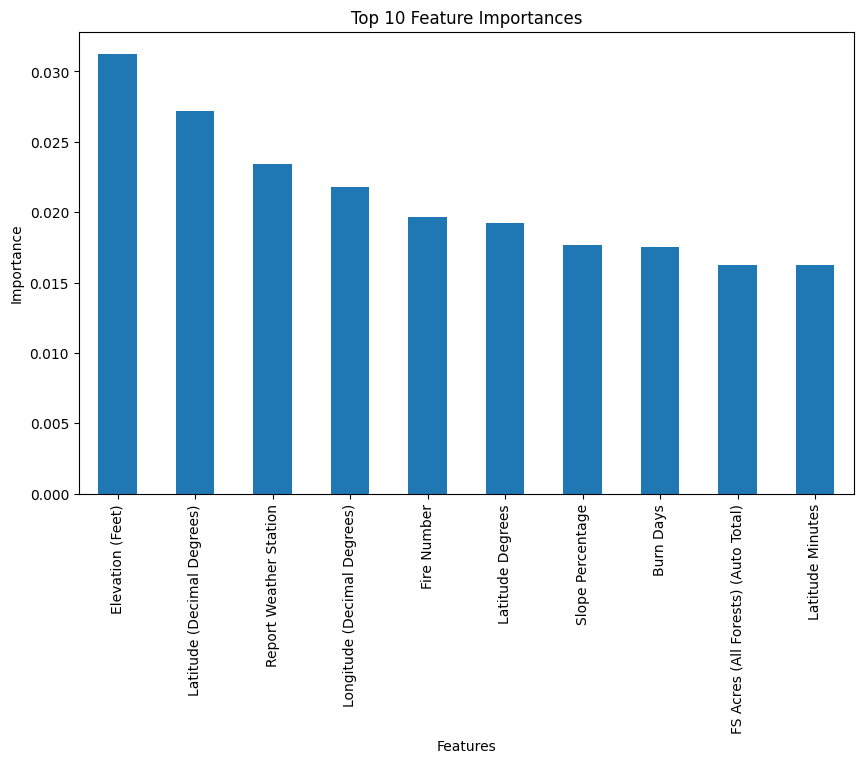

Elevation (Feet)                       0.031258
Latitude (Decimal Degrees)             0.027163
Report Weather Station                 0.023416
Longitude (Decimal Degrees)            0.021795
Fire Number                            0.019637
Latitude Degrees                       0.019255
Slope Percentage                       0.017702
Burn Days                              0.017499
FS Acres (All Forests) (Auto Total)    0.016260
Latitude Minutes                       0.016218
dtype: float64

In [31]:
print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))

#This next part is feature importance a-la Chat-GPT
encoded_feature_names = (
    pipeline.named_steps["preprocessor"]
    .transformers_[1][1]
    .get_feature_names_out(categorical_features)
)
all_feature_names = numerical_features + list(encoded_feature_names)
feature_importances = pipeline.named_steps["classifier"].feature_importances_


feature_importances_series = pd.Series(feature_importances, index=all_feature_names).sort_values(ascending=False)

# Plot top 10 features
plt.figure(figsize=(10, 6))
feature_importances_series.head(10).plot(kind="bar")
plt.title("Top 10 Feature Importances")
plt.xlabel("Features")
plt.ylabel("Importance")
plt.xticks(rotation=90)
plt.show()

# Return feature importances for further inspection
feature_importances_series.head(10)


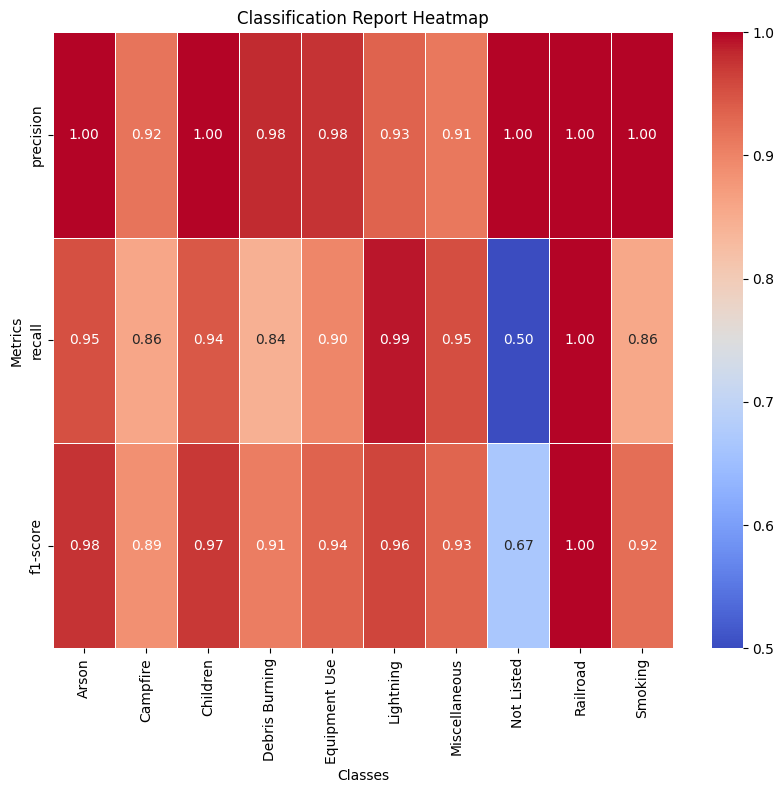

In [32]:
# Generate classification report as a dictionary
report_dict = classification_report(y_test, y_pred, output_dict=True)

# Convert to a DataFrame
report_df = pd.DataFrame(report_dict).T
report_df = report_df.drop(["accuracy", "macro avg", "weighted avg"])  # Drop overall stats

# Plot heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(
    report_df[["precision", "recall", "f1-score"]].T,  # Transpose for better orientation
    annot=True,
    fmt=".2f",
    cmap="coolwarm",
    linewidths=0.5,
)
plt.title("Classification Report Heatmap")
plt.xlabel("Classes")
plt.ylabel("Metrics")
plt.show()

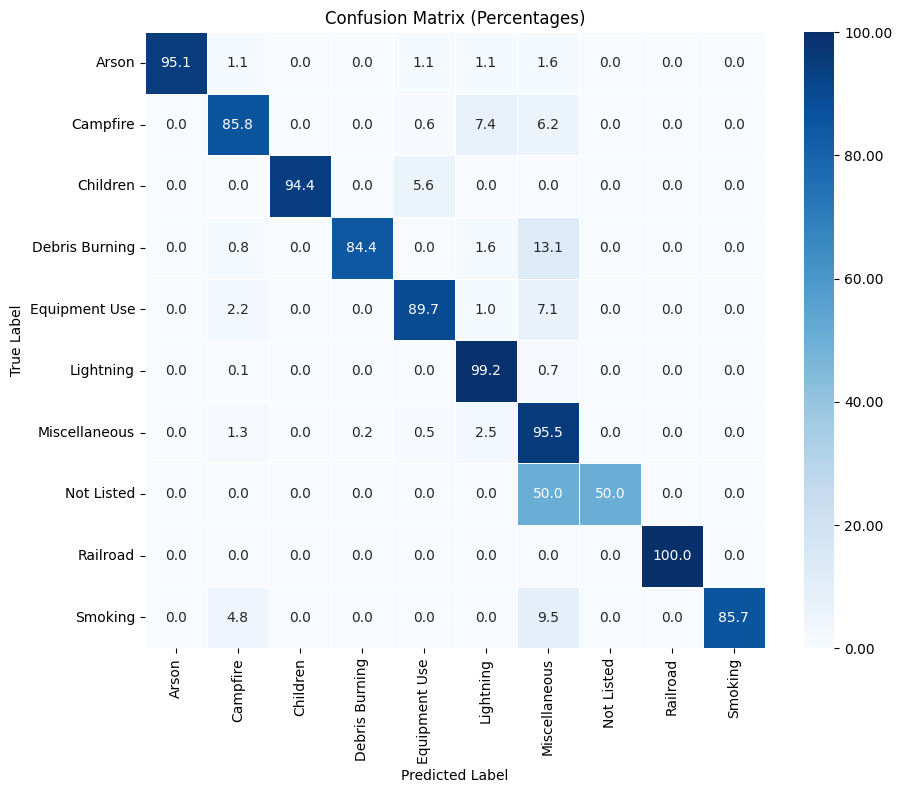

In [53]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay


# Generate confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)

# Normalize confusion matrix by percentage (row-wise normalization)
conf_matrix_percent = np.round(conf_matrix.astype('float') / conf_matrix.sum(axis=1, keepdims=True) * 100, 3)

np.set_printoptions(suppress=True, precision=3)
class_labels = list(report_dict.keys())[:-3]



# Plot confusion matrix as percentages
disp = ConfusionMatrixDisplay(confusion_matrix=conf_matrix_percent, display_labels=list(report_dict.keys())[:-3])
fig, ax = plt.subplots(figsize=(10, 8))  # Create a figure for customization
sns.heatmap(
    conf_matrix_percent,
    annot=True,                # Show the values
    fmt=".1f",                 # Force values to show with 3 decimals
    cmap="Blues",
    linewidths=0.5,
    xticklabels=class_labels,  # Set class names on the x-axis
    yticklabels=class_labels,  # Set class names on the y-axis
    cbar_kws={"format": "%.2f"}  # Format color bar to suppress scientific notation
)

# Add labels and title
plt.title("Confusion Matrix (Percentages)")
plt.ylabel("True Label")
plt.xlabel("Predicted Label")
plt.show()


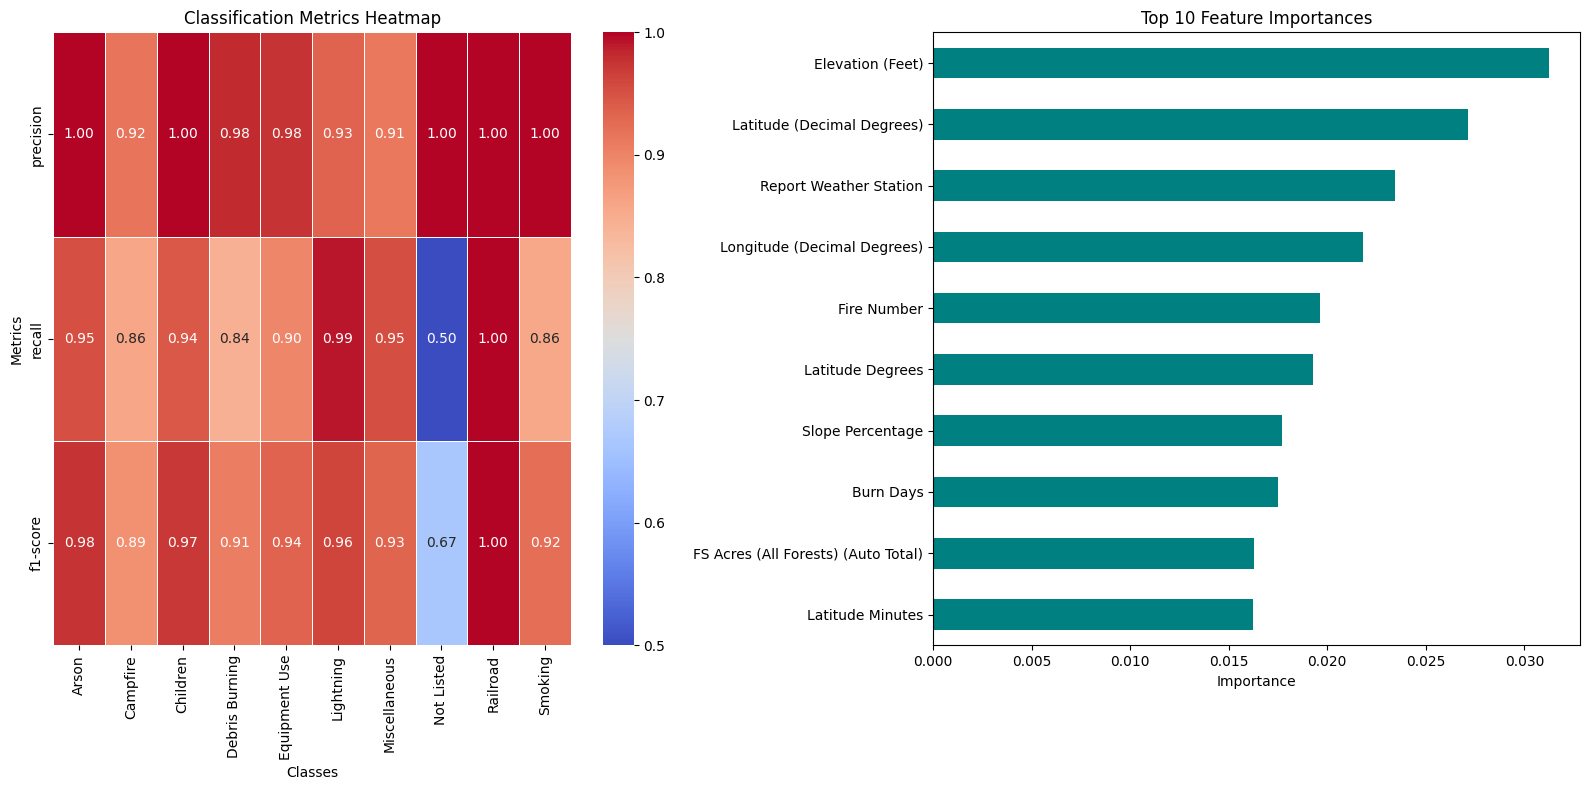

In [40]:
# Top 10 features from feature importance
top_features = feature_importances_series.head(10)

# Create a combined figure with heatmap and feature importance
fig, ax = plt.subplots(1, 2, figsize=(16, 8))

# Plot classification metrics heatmap
sns.heatmap(
    report_df[["precision", "recall", "f1-score"]].T,
    annot=True,
    fmt=".2f",
    cmap="coolwarm",
    linewidths=0.5,
    ax=ax[0],
)
ax[0].set_title("Classification Metrics Heatmap")
ax[0].set_xlabel("Classes")
ax[0].set_ylabel("Metrics")

# Plot feature importance
top_features.plot(kind="barh", ax=ax[1], color="teal")
ax[1].set_title("Top 10 Feature Importances")
ax[1].set_xlabel("Importance")
ax[1].invert_yaxis()  # Invert for better readability

plt.tight_layout()
plt.show()


What if we drop the lat long (seprated out) columns

Accuracy: 0.9336563548266865

Classification Report:
                 precision    recall  f1-score   support

         Arson       1.00      0.95      0.97       185
      Campfire       0.94      0.85      0.89       323
      Children       1.00      0.94      0.97        18
Debris Burning       1.00      0.83      0.91       122
 Equipment Use       0.97      0.89      0.93       409
     Lightning       0.93      0.99      0.96       760
 Miscellaneous       0.90      0.95      0.93       837
    Not Listed       1.00      0.50      0.67         2
      Railroad       1.00      1.00      1.00         6
       Smoking       1.00      0.86      0.92        21

      accuracy                           0.93      2683
     macro avg       0.97      0.88      0.91      2683
  weighted avg       0.94      0.93      0.93      2683



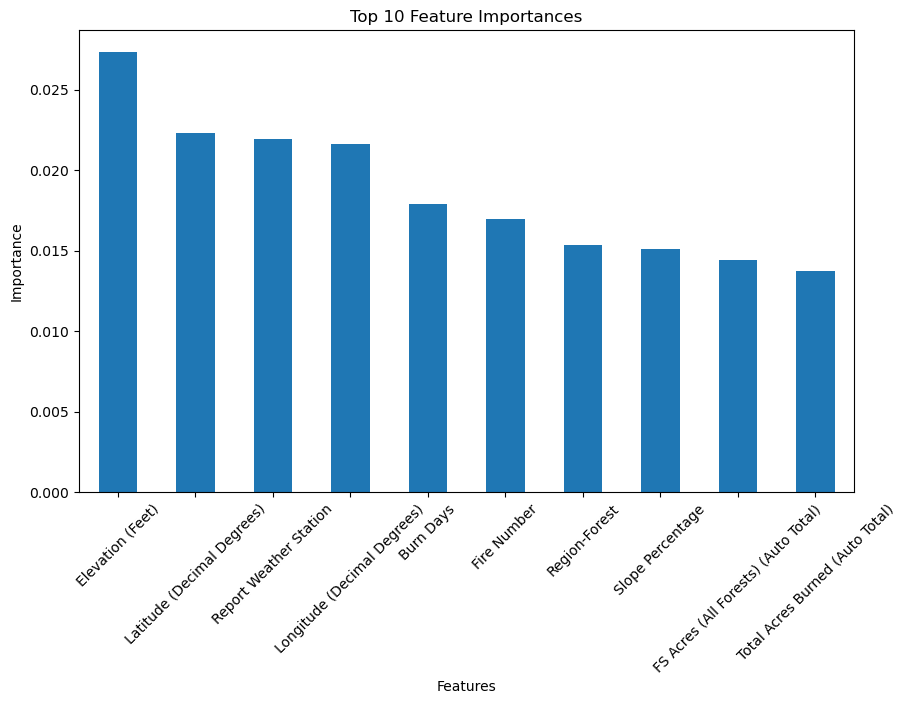

In [9]:
target_column = "Statistical Fire Cause Description"
exclude_columns = ["Fire ID", "Unique FireID", "Ignition Date", "Discovery Date", 'General Fire Cause Description', 'Specific Fire Cause Description',
       'Class People Cause Description', 'Latitude Degrees', 'Latitude Minutes',
       'Latitude Seconds', 'Longitude Degrees', 'Longitude Minutes',
       'Longitude Seconds', target_column]
X = fire_data.drop(columns=exclude_columns)
y = fire_data[target_column]

numerical_features = X.select_dtypes(include=["float64", "int64"]).columns.tolist()
categorical_features = X.select_dtypes(include=["object"]).columns.tolist()

preprocessor = ColumnTransformer(
    transformers=[
        ("num", StandardScaler(), numerical_features),
        ("cat", OneHotEncoder(handle_unknown="ignore"), categorical_features),
    ]
)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

rf_model = RandomForestClassifier(random_state=42)
pipeline = Pipeline(steps=[("preprocessor", preprocessor), ("classifier", rf_model)])
pipeline.fit(X_train, y_train)

y_pred = pipeline.predict(X_test)

print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))


encoded_feature_names = (
    pipeline.named_steps["preprocessor"]
    .transformers_[1][1]
    .get_feature_names_out(categorical_features)
)
all_feature_names = numerical_features + list(encoded_feature_names)
feature_importances = pipeline.named_steps["classifier"].feature_importances_

# Create a sorted series for feature importances
import pandas as pd

feature_importances_series = pd.Series(feature_importances, index=all_feature_names).sort_values(ascending=False)

# Plot top 10 features
plt.figure(figsize=(10, 6))
feature_importances_series.head(10).plot(kind="bar")
plt.title("Top 10 Feature Importances")
plt.xlabel("Features")
plt.ylabel("Importance")
plt.xticks(rotation=45)
plt.show()


### RMSE

In [54]:
label_encoder = LabelEncoder()
y_pred_encoded = label_encoder.fit_transform(y_pred)  # Fit on training labels
y_test_encoded = label_encoder.fit_transform(y_test)  

rmse = np.sqrt(mean_squared_error(y_test_encoded, y_pred_encoded))
print("RMSE for Class Predictions:", rmse)

y_prob = pipeline.predict_proba(X_test)


lb = LabelBinarizer()
y_test_binarized = lb.fit_transform(y_test)


rmse_prob = np.sqrt(mean_squared_error(y_test_binarized, y_prob))
print("RMSE for Predicted Probabilities:", rmse_prob)


RMSE for Class Predictions: 0.8390843917473952
RMSE for Predicted Probabilities: 0.10683851776452899


### Try XGboost

In [ ]:
label_encoder = LabelEncoder()
y_train_encoded = label_encoder.fit_transform(y_train)  # Fit on training labels
y_test_encoded = label_encoder.fit_transform(y_test)  

xgb_model = XGBClassifier(random_state=42,  eval_metric='rmse')

# Define the pipeline
pipeline = Pipeline(steps=[
    ("preprocessor", preprocessor),  
    ("classifier", xgb_model)       
])


pipeline.fit(X_train, y_train_encoded)

y_pred_encoded = pipeline.predict(X_test)
y_pred = label_encoder.inverse_transform(y_pred_encoded)

# Evaluate the model
from sklearn.metrics import classification_report, accuracy_score

print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))


Accuracy: 0.8837122623928438

Classification Report:
                 precision    recall  f1-score   support

         Arson       0.99      0.78      0.87       185
      Campfire       0.85      0.79      0.82       323
      Children       1.00      0.94      0.97        18
Debris Burning       0.85      0.80      0.82       122
 Equipment Use       0.92      0.84      0.88       409
     Lightning       0.91      0.96      0.94       760
 Miscellaneous       0.83      0.90      0.87       837
    Not Listed       1.00      0.50      0.67         2
      Railroad       1.00      1.00      1.00         6
       Smoking       1.00      0.86      0.92        21

      accuracy                           0.88      2683
     macro avg       0.94      0.84      0.88      2683
  weighted avg       0.89      0.88      0.88      2683



### Ensemble Methods <br>
Closest to RF accuracy

In [188]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

vote_model = VotingClassifier(
    estimators=[
        ('rf', RandomForestClassifier(random_state=42)),
        ('xgb', XGBClassifier(random_state=42, eval_metric='merror')),
        ('lgbm', LGBMClassifier(random_state=42)),
    ],
    voting='hard'
)
pipeline = Pipeline(steps=[
    ("preprocessor", preprocessor),  
    ("classifier", vote_model)        
])

pipeline.fit(X_train, y_train)

y_pred = pipeline.predict(X_test)

print("Accuracy:", accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))

[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.014160 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 4129
[LightGBM] [Info] Number of data points in the train set: 10732, number of used features: 1069
[LightGBM] [Info] Start training from score -2.675687
[LightGBM] [Info] Start training from score -2.115492
[LightGBM] [Info] Start training from score -5.032490
[LightGBM] [Info] Start training from score -3.092721
[LightGBM] [Info] Start training from score -1.882811
[LightGBM] [Info] Start training from score -1.260715
[LightGBM] [Info] Start training from score -1.164568
[LightGBM] [Info] Start training from score -7.335075
[LightGBM] [Info] Start training from score -6.062109
[LightGBM] [Info] Start training from score -4.826638
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No furthe

### Hyperparameter Tuning

In [ ]:
pipeline = Pipeline(steps=[
    ("preprocessor", preprocessor), 
    ("classifier", RandomForestClassifier(random_state=42)) 
])


param_grid = {
    "classifier__n_estimators": [100, 200],
    "classifier__max_depth": [None, 10, 20],
    "classifier__min_samples_split": [2, 5],
}


grid_search = GridSearchCV(
    pipeline, param_grid, cv=3, scoring="accuracy", verbose=2
)

grid_search.fit(X_train, y_train)

best_pipeline = grid_search.best_estimator_
print("Best Parameters:", grid_search.best_params_)

y_pred = best_pipeline.predict(X_test)
print("Best Model Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))

Fitting 3 folds for each of 12 candidates, totalling 36 fits
[CV] END classifier__max_depth=None, classifier__min_samples_split=2, classifier__n_estimators=100; total time=   9.3s
[CV] END classifier__max_depth=None, classifier__min_samples_split=2, classifier__n_estimators=100; total time=  11.1s
[CV] END classifier__max_depth=None, classifier__min_samples_split=2, classifier__n_estimators=100; total time=  12.3s
[CV] END classifier__max_depth=None, classifier__min_samples_split=2, classifier__n_estimators=200; total time=  22.8s
[CV] END classifier__max_depth=None, classifier__min_samples_split=2, classifier__n_estimators=200; total time=  19.3s
[CV] END classifier__max_depth=None, classifier__min_samples_split=2, classifier__n_estimators=200; total time=  19.2s
[CV] END classifier__max_depth=None, classifier__min_samples_split=5, classifier__n_estimators=100; total time=   7.1s
[CV] END classifier__max_depth=None, classifier__min_samples_split=5, classifier__n_estimators=100; total 

In [189]:
label_encoder = LabelEncoder()
y_pred_encoded = label_encoder.fit_transform(y_pred)  # Fit on training labels
y_test_encoded = label_encoder.fit_transform(y_test)  

rmse = np.sqrt(mean_squared_error(y_test_encoded, y_pred_encoded))
print("RMSE for Class Predictions:", rmse)

RMSE for Class Predictions: 0.9985080185648376


## Size of Fire Regression

In [55]:
X_train.columns

Index(['Discovery Calendar Year', 'Location', 'Region-Forest', 'District',
       'Fire Number', 'Protection Agency', 'Ownership Origin',
       'County at Origin', 'Fire Class Size', 'Latitude (Decimal Degrees)',
       'Longitude (Decimal Degrees)', 'Latitude Degrees', 'Latitude Minutes',
       'Latitude Seconds', 'Longitude Degrees', 'Longitude Minutes',
       'Longitude Seconds', 'Ignition Date', 'Discovery Date',
       'In Large Complex?', 'Acres Burned in WUI?', 'Escaped Fire?',
       'Initial Action Date', 'Suppression Strategy Attained Date',
       'Fire Out Date', 'Resource Type Description',
       'FS Acres (All Forests) (Auto Total)',
       'Non-FS Acres Protected by FS (Auto Total)',
       'Non-FS Acres Not Protected by FS (Auto Total)',
       'Total Acres Burned (Auto Total)', 'Fire Intensity Level Description',
       'Report Weather Station', 'Cover Class Description', 'Slope Percentage',
       'Aspect', 'Elevation (Feet)', 'Burn Days'],
      dtype='object')

### Lin Reg

In [55]:
exclude_columns = ['Fire ID', 'Unique FireID', 'Fire Name', 'Latitude Degrees', 'Latitude Minutes',
       'Non-FS Acres Not Protected by FS (Auto Total)', 'Latitude Seconds', 'Longitude Degrees', 'Longitude Minutes', 'FS Acres (All Forests) (Auto Total)',
       'Longitude Seconds', 'Ignition Time', 'Discovery Time', 'Initial Action Time', 'Suppression Strategy Attained Time',
                   'Fire Out Time', 'Total Acres Burned (Auto Total)']
X = fire_data.drop(columns=exclude_columns)
y = fire_data['Total Acres Burned (Auto Total)']

numerical_features = X.select_dtypes(include=["float64", "int64"]).columns
categorical_features = X.select_dtypes(include=["object"]).columns

preprocessor = ColumnTransformer(
    transformers=[
        ("num", StandardScaler(), numerical_features),
        ("cat", OneHotEncoder(handle_unknown="ignore"), categorical_features),
    ]
)

unique_fire_ids = fire_data['Fire ID'].unique()

train_fire_ids, test_fire_ids = train_test_split(unique_fire_ids, test_size=0.2, random_state=42)

# Filter rows for training and testing based on fire IDs
train_data = fire_data[fire_data['Fire ID'].isin(train_fire_ids)]
test_data = fire_data[fire_data['Fire ID'].isin(test_fire_ids)]

# Create X and y for train and test
X_train = train_data.drop(columns=exclude_columns)
y_train = train_data['Total Acres Burned (Auto Total)']
X_test = test_data.drop(columns=exclude_columns)
y_test = test_data['Total Acres Burned (Auto Total)']


# Step 5: Regression model pipeline
pipeline = Pipeline(steps=[
    ("preprocessor", preprocessor),
    ("regressor", LinearRegression())
])

# Train the model
pipeline.fit(X_train, y_train)

# Predict on test data
y_pred = pipeline.predict(X_test)

# Evaluate the model
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"RMSE: {rmse}")
print(f"MAE: {mae}")
print(f"R²: {r2}")


RMSE: 2741.0612844135626
MAE: 1118.0803146509163
R²: 0.42773993897928264


In [56]:
X_train.head()

,Discovery Calendar Year,Location,Region-Forest,District,Fire Number,Protection Agency,Ownership Origin,County at Origin,Fire Class Size,Latitude (Decimal Degrees),Longitude (Decimal Degrees),Ignition Date,Discovery Date,Statistical Fire Cause Description,General Fire Cause Description,Specific Fire Cause Description,Class People Cause Description,In Large Complex?,Acres Burned in WUI?,Escaped Fire?,Initial Action Date,Suppression Strategy Attained Date,Fire Out Date,Resource Type Description,Non-FS Acres Protected by FS (Auto Total),Fire Intensity Level Description,Report Weather Station,Cover Class Description,Slope Percentage,Aspect,Elevation (Feet),Burn Days
0,2016,Not Listed,417,2.0,1,USFS,USFS,51,A,38.399444,-119.535833,2016-01-13,2016-01-13,Equipment Use,Other,Exhaust-Other,Public Employee,N,N,No,2016-01-13,2016-01-13,2016-01-14,Suppression Person,0.0,Flame Length 0-2',43707,Mature timber,5.0,0,8500.0,1
1,2016,Woodfords- off monroe ranch rd,417,1.0,2,USFS,Private,3,A,38.768333,-119.829167,2016-05-04,2016-05-04,Lightning,Other,Lightning,Lightning,N,N,No,2016-05-04,2016-05-04,2016-05-31,Suppression Person,0.1,Flame Length 0-2',42802,Litter light,5.0,1,5707.0,27
2,2016,Willow Creek,417,1.0,4,USFS,USFS,3,A,38.812222,-119.908889,2016-06-19,2016-06-20,Miscellaneous,Other,Other,Other,N,N,No,2016-06-20,2016-06-20,2016-06-28,Suppression Person,0.0,Flame Length 0-2',42802,Mature timber mixed,1.0,9,8100.0,9
3,2016,Dog Valley,417,1.0,7,USFS,USFS,91,A,39.549444,-120.039444,2016-06-24,2016-06-24,Campfire,Other Recreation,Warming Fire,Visitor,N,N,No,2016-06-24,2016-06-24,2016-07-08,Patrol,0.0,Flame Length 0-2',41302,Mature timber mixed,1.0,0,6100.0,14
4,2016,Dog Valley,417,1.0,7,USFS,USFS,91,A,39.549444,-120.039444,2016-06-24,2016-06-24,Campfire,Other Recreation,Warming Fire,Visitor,N,N,No,2016-06-24,2016-06-24,2016-07-08,Engine 4 (750 gal),0.0,Flame Length 0-2',41302,Mature timber mixed,1.0,0,6100.0,14


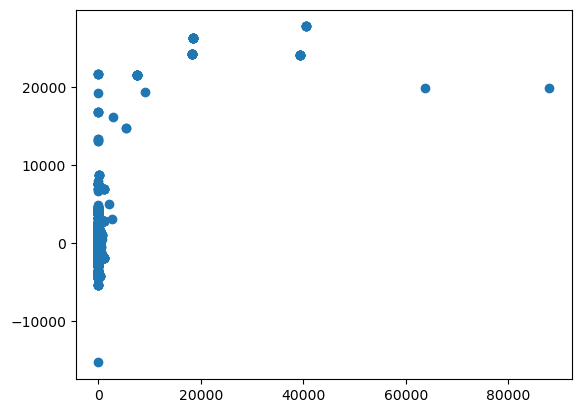

In [57]:
plt.scatter(y_test, y_pred)

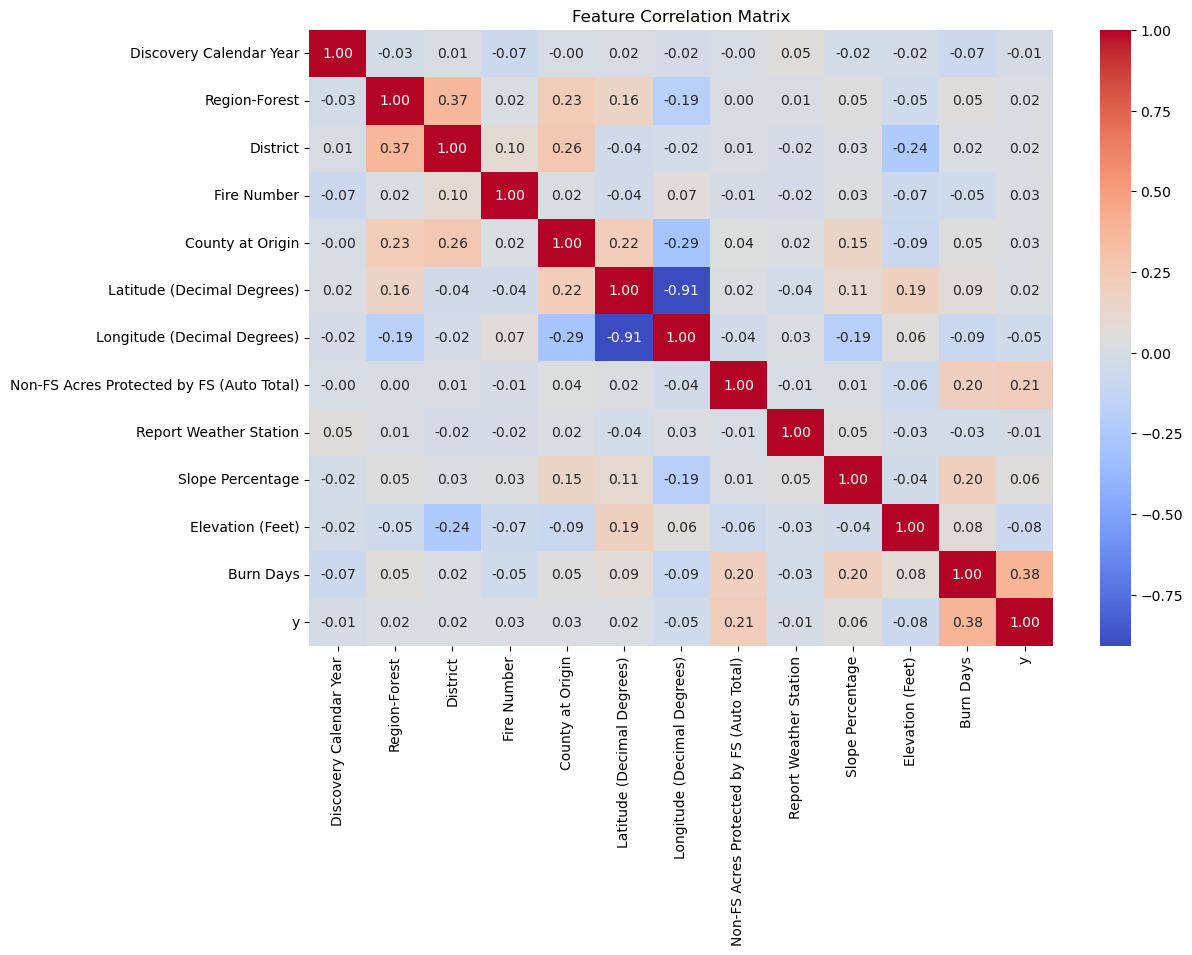

In [58]:
Xy = X_train.copy()[numerical_features]
Xy['y'] = y_train

correlation_matrix = Xy.corr()

plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap="coolwarm", xticklabels=Xy.columns,
    yticklabels=Xy.columns)
plt.title("Feature Correlation Matrix")
plt.show()

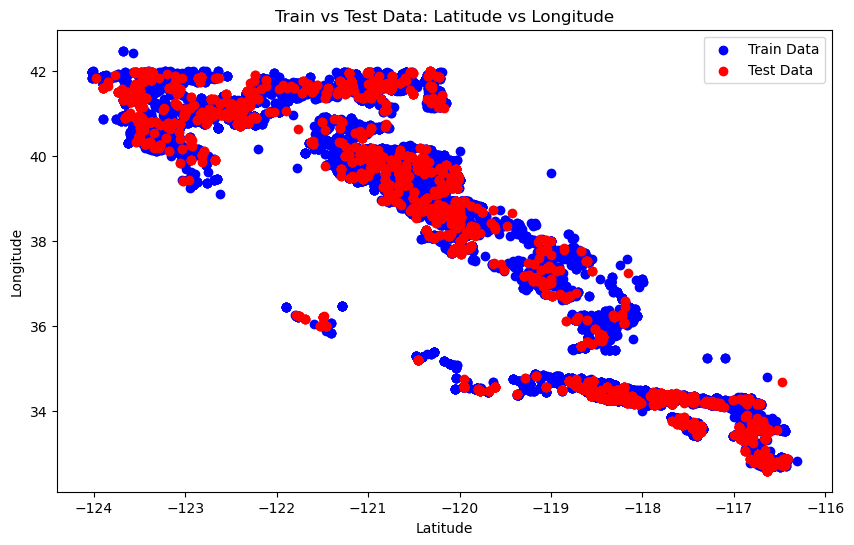

In [17]:
plt.figure(figsize=(10, 6))
plt.scatter(X_train['Longitude (Decimal Degrees)'], X_train['Latitude (Decimal Degrees)'],color='blue', label='Train Data')
plt.scatter(X_test['Longitude (Decimal Degrees)'], X_test['Latitude (Decimal Degrees)'], color='red', label='Test Data')

# Add labels, legend, and title
plt.xlabel('Latitude')
plt.ylabel('Longitude')
plt.title('Train vs Test Data: Latitude vs Longitude')
plt.legend()

# Show the plot
plt.show()

In [59]:
vif_data = pd.DataFrame()
vif_data["Feature"] = numerical_features
vif_data["VIF"] = [
    variance_inflation_factor(X[numerical_features].values, i)
    for i in range(len(numerical_features))
]

print(vif_data)

                                      Feature           VIF
0                     Discovery Calendar Year  22134.896468
1                               Region-Forest   1377.563097
2                                    District     24.497114
3                                 Fire Number      2.653283
4                            County at Origin      6.471238
5                  Latitude (Decimal Degrees)   1437.566220
6                 Longitude (Decimal Degrees)  32479.256081
7   Non-FS Acres Protected by FS (Auto Total)      1.053211
8                      Report Weather Station      2.634789
9                            Slope Percentage      1.967049
10                           Elevation (Feet)      7.965435
11                                  Burn Days      1.300287


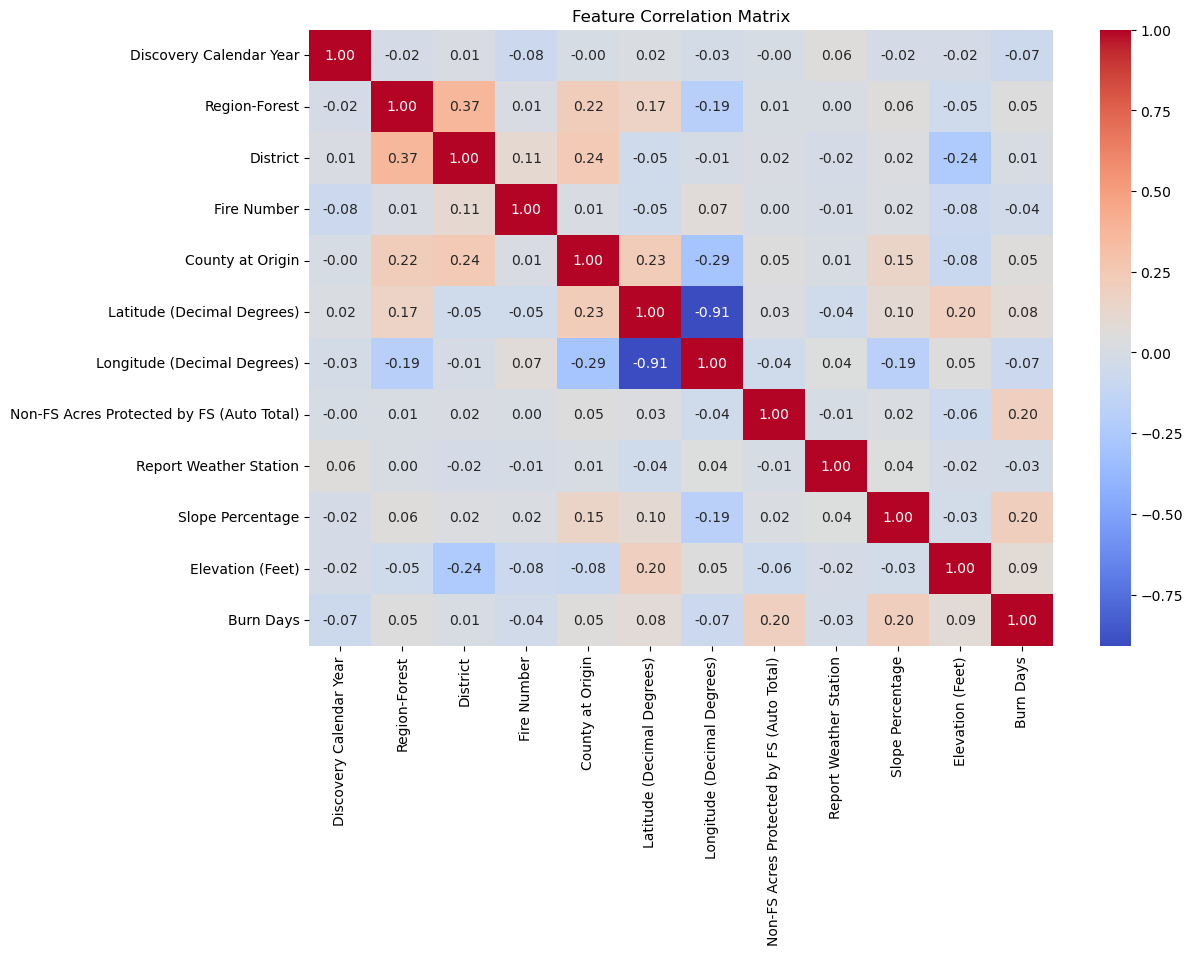

In [19]:

correlation_matrix = np.corrcoef(X[numerical_features], rowvar=False)
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap="coolwarm", xticklabels=numerical_features,
    yticklabels=numerical_features)
plt.title("Feature Correlation Matrix")
plt.show()

## Try other models

In [24]:

models = {
    "Linear Regression": LinearRegression(),
    "Ridge": Ridge(),
    "Lasso": Lasso(),
    "ElasticNet": ElasticNet(),
    "Decision Tree": DecisionTreeRegressor(random_state=42),
    "Random Forest": RandomForestRegressor(random_state=42),
    "Gradient Boosting": GradientBoostingRegressor(random_state=42),
    "XGBoost": XGBRegressor(random_state=42),
    "LightGBM": LGBMRegressor(random_state=42),
    #"CatBoost": CatBoostRegressor(random_state=42, verbose=0),
    "SVR": SVR(),
    "KNN": KNeighborsRegressor()
}


In [60]:
results = []


for name, model in models.items():
    pipeline = Pipeline(steps=[
        ("preprocessor", preprocessor),
        ("regressor", model)
    ])
    pipeline.fit(X_train, y_train)
    
    y_pred = pipeline.predict(X_test)
    
    rmse = np.sqrt(mean_squared_error(y_test, y_pred))
    mae = mean_absolute_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)
    
    results.append({
        "Model": name,
        "RMSE": rmse,
        "MAE": mae,
        "R²": r2
    })

results_df = pd.DataFrame(results)
results_df.sort_values(by="RMSE", ascending=True, inplace=True)



[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.014722 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 3334
[LightGBM] [Info] Number of data points in the train set: 10500, number of used features: 925
[LightGBM] [Info] Start training from score 844.885396


In [61]:
results_df

,Model,RMSE,MAE,R²
5,Random Forest,1953.293233,199.441687,0.709403
6,Gradient Boosting,2038.737139,231.223879,0.683424
7,XGBoost,2168.479432,225.012237,0.641849
2,Lasso,2207.810311,249.006736,0.628739
0,Linear Regression,2741.061284,1118.080315,0.427740
1,Ridge,2962.918649,1319.944523,0.331355
8,LightGBM,3286.890130,524.937049,0.177139
3,ElasticNet,3360.774980,1356.580895,0.139730
9,SVR,3642.257523,406.023814,-0.010409
4,Decision Tree,3870.361293,447.854264,-0.140930


In [98]:
exclude_columns = ['Fire ID', 'Unique FireID', 'Fire Number', 'Fire Name', 'Latitude Degrees', 'Latitude Minutes',
       'Non-FS Acres Not Protected by FS (Auto Total)', 'Latitude Seconds', 'Longitude Degrees', 'Longitude Minutes', 'FS Acres (All Forests) (Auto Total)', 
       'Non-FS Acres Protected by FS (Auto Total)', 
       'Longitude Seconds', 'Ignition Time', 'Discovery Time', 'Initial Action Time', 'Suppression Strategy Attained Time',
                   'Fire Out Time', 'Total Acres Burned (Auto Total)', 'Discovery Calendar Year']
X = fire_data.drop(columns=exclude_columns)
y = fire_data['Total Acres Burned (Auto Total)']

numerical_features = X.select_dtypes(include=["float64", "int64"]).columns
categorical_features = X.select_dtypes(include=["object"]).columns

preprocessor = ColumnTransformer(
    transformers=[
        ("num", StandardScaler(), numerical_features),
        ("cat", OneHotEncoder(handle_unknown="ignore"), categorical_features),
    ]
)

unique_fire_ids = fire_data['Fire ID'].unique()

train_fire_ids, test_fire_ids = train_test_split(unique_fire_ids, test_size=0.2, random_state=42)

# Filter rows for training and testing based on fire IDs
train_data = fire_data[fire_data['Fire ID'].isin(train_fire_ids)]
test_data = fire_data[fire_data['Fire ID'].isin(test_fire_ids)]

# Create X and y for train and test
X_train = train_data.drop(columns=exclude_columns)
y_train = train_data['Total Acres Burned (Auto Total)']
X_test = test_data.drop(columns=exclude_columns)
y_test = test_data['Total Acres Burned (Auto Total)']

X_train.columns

Index(['Location', 'Region-Forest', 'District', 'Protection Agency',
       'Ownership Origin', 'County at Origin', 'Fire Class Size',
       'Latitude (Decimal Degrees)', 'Longitude (Decimal Degrees)',
       'Ignition Date', 'Discovery Date', 'Statistical Fire Cause Description',
       'General Fire Cause Description', 'Specific Fire Cause Description',
       'Class People Cause Description', 'In Large Complex?',
       'Acres Burned in WUI?', 'Escaped Fire?', 'Initial Action Date',
       'Suppression Strategy Attained Date', 'Fire Out Date',
       'Resource Type Description', 'Fire Intensity Level Description',
       'Report Weather Station', 'Cover Class Description', 'Slope Percentage',
       'Aspect', 'Elevation (Feet)', 'Burn Days'],
      dtype='object')

In [99]:
preprocessor = ColumnTransformer(
    transformers=[
        ("num", StandardScaler(), numerical_features),
        ("cat", OneHotEncoder(handle_unknown="ignore"), categorical_features),
    ]
)
pipeline = Pipeline(steps=[
    ("preprocessor", preprocessor),
    ("regressor", RandomForestRegressor(random_state=42))
])

pipeline.fit(X_train, y_train)

y_pred = pipeline.predict(X_test)

rmse = np.sqrt(mean_squared_error(y_test, y_pred))
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"RMSE: {rmse}")
print(f"MAE: {mae}")
print(f"R²: {r2}")

RMSE: 1758.1698857085541
MAE: 177.47803907375643
R²: 0.7645614253371619


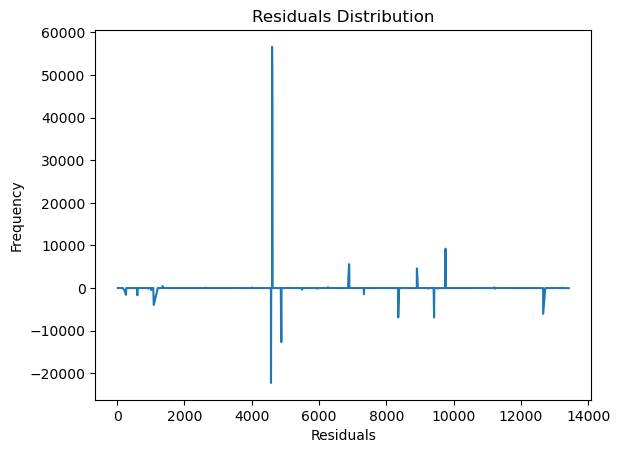

In [100]:
residuals = y_test - y_pred

residuals = y_test - y_pred


plt.plot(residuals)
plt.title("Residuals Distribution")
plt.xlabel("Residuals")
plt.ylabel("Frequency")
plt.show()


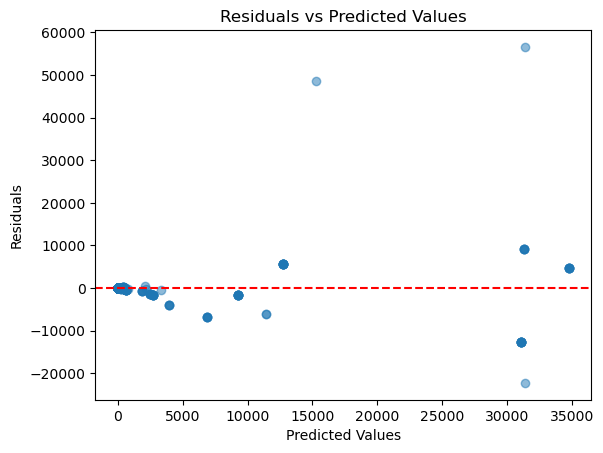

In [101]:
plt.scatter(y_pred, residuals, alpha=0.5)
plt.axhline(0, color='red', linestyle='--')
plt.title("Residuals vs Predicted Values")
plt.xlabel("Predicted Values")
plt.ylabel("Residuals")
plt.show()

Likely means there are outliers in the data - test

In [102]:
from scipy.stats import zscore

# Calculate z-scores for residuals
z_scores = zscore(residuals)

# Identify outliers (e.g., z-score > 3 or < -3)
outliers = np.where(np.abs(z_scores) > 3)[0]
print(f"Outlier Indices: {outliers}")


Outlier Indices: [1078 1092 1093 1152 1153 1154 1155 1156 1157 1158 1159 1160 1161 1505
 1506 1507 1508 1509 1510 1511 1512 1513 1514 1515 1862 1863 1864 1865
 2065 2129 2130 2131 2132 2133 2773 2774]


### Try a log transform

In [119]:
exclude_columns = ['Fire ID', 'Unique FireID', 'Fire Number', 'Fire Name', 'Latitude Degrees', 'Latitude Minutes',
       'Non-FS Acres Not Protected by FS (Auto Total)', 'Latitude Seconds', 'Longitude Degrees', 'Longitude Minutes', 'FS Acres (All Forests) (Auto Total)', 
       'Non-FS Acres Protected by FS (Auto Total)', 
       'Longitude Seconds', 'Ignition Time', 'Discovery Time', 'Initial Action Time', 'Suppression Strategy Attained Time',
                   'Fire Out Time', 'Total Acres Burned (Auto Total)', 'Discovery Calendar Year']
X = fire_data.drop(columns=exclude_columns)
y = fire_data['Total Acres Burned (Auto Total)']



numerical_features = X.select_dtypes(include=["float64", "int64"]).columns
categorical_features = X.select_dtypes(include=["object"]).columns

preprocessor = ColumnTransformer(
    transformers=[
        ("num", StandardScaler(), numerical_features),
        ("cat", OneHotEncoder(handle_unknown="ignore"), categorical_features),
    ]
)
pipeline = Pipeline(steps=[
    ("preprocessor", preprocessor),
    ("regressor", RandomForestRegressor(random_state=42))
])

unique_fire_ids = fire_data['Fire ID'].unique()

train_fire_ids, test_fire_ids = train_test_split(unique_fire_ids, test_size=0.2, random_state=42)

# Filter rows for training and testing based on fire IDs
train_data = fire_data[fire_data['Fire ID'].isin(train_fire_ids)]
test_data = fire_data[fire_data['Fire ID'].isin(test_fire_ids)]

# Create X and y for train and test
X_train = train_data.drop(columns=exclude_columns)
y_train = train_data['Total Acres Burned (Auto Total)']
X_test = test_data.drop(columns=exclude_columns)
y_test = test_data['Total Acres Burned (Auto Total)']
print(X_train.columns)

y_train = np.log1p(y_train)
y_test = np.log1p(y_test)

pipeline.fit(X_train, y_train)

y_pred = pipeline.predict(X_test)

rmse = np.sqrt(mean_squared_error(y_test, y_pred))
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"RMSE: {rmse}")
print(f"MAE: {mae}")
print(f"R²: {r2}")

Index(['Location', 'Region-Forest', 'District', 'Protection Agency',
       'Ownership Origin', 'County at Origin', 'Fire Class Size',
       'Latitude (Decimal Degrees)', 'Longitude (Decimal Degrees)',
       'Ignition Date', 'Discovery Date', 'Statistical Fire Cause Description',
       'General Fire Cause Description', 'Specific Fire Cause Description',
       'Class People Cause Description', 'In Large Complex?',
       'Acres Burned in WUI?', 'Escaped Fire?', 'Initial Action Date',
       'Suppression Strategy Attained Date', 'Fire Out Date',
       'Resource Type Description', 'Fire Intensity Level Description',
       'Report Weather Station', 'Cover Class Description', 'Slope Percentage',
       'Aspect', 'Elevation (Feet)', 'Burn Days'],
      dtype='object')
RMSE: 0.4591381395850875
MAE: 0.26418142598505107
R²: 0.9407592784467462


In [113]:
set(fire_data['Fire Class Size'])

{'A', 'B', 'C', 'D', 'E', 'F', 'G', 'Missing Data'}

In [106]:
results = []


for name, model in models.items():
    pipeline = Pipeline(steps=[
        ("preprocessor", preprocessor),
        ("regressor", model)
    ])
    pipeline.fit(X_train, y_train)
    
    y_pred = pipeline.predict(X_test)
    
    rmse = np.sqrt(mean_squared_error(y_test, y_pred))
    mae = mean_absolute_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)
    
    results.append({
        "Model": name,
        "RMSE": rmse,
        "MAE": mae,
        "R²": r2
    })

results_df = pd.DataFrame(results)
results_df.sort_values(by="RMSE", ascending=True, inplace=True)

results_df

[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.017732 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 3042
[LightGBM] [Info] Number of data points in the train set: 10500, number of used features: 922
[LightGBM] [Info] Start training from score 1.185453


,Model,RMSE,MAE,R²
7,XGBoost,0.409839,0.253402,0.952798
8,LightGBM,0.416479,0.261759,0.951256
6,Gradient Boosting,0.425795,0.266493,0.949051
5,Random Forest,0.459138,0.264181,0.940759
1,Ridge,0.472283,0.335393,0.937319
4,Decision Tree,0.554763,0.321884,0.913513
9,SVR,0.711423,0.438673,0.857771
0,Linear Regression,0.983242,0.758709,0.728322
10,KNN,1.248292,0.647582,0.562109
3,ElasticNet,1.713141,1.174362,0.175255


In [120]:
exclude_columns = ['Fire ID', 'Unique FireID', 'Fire Number', 'Fire Name', 'Latitude Degrees', 'Latitude Minutes',
       'Non-FS Acres Not Protected by FS (Auto Total)', 'Latitude Seconds', 'Longitude Degrees', 'Longitude Minutes', 'FS Acres (All Forests) (Auto Total)', 
       'Non-FS Acres Protected by FS (Auto Total)', 
       'Longitude Seconds', 'Ignition Time', 'Discovery Time', 'Initial Action Time', 'Suppression Strategy Attained Time',
                   'Fire Out Time', 'Total Acres Burned (Auto Total)', 'Discovery Calendar Year', 'Acres Burned in WUI?']
X = fire_data.drop(columns=exclude_columns)
y = fire_data['Total Acres Burned (Auto Total)']

numerical_features = X.select_dtypes(include=["float64", "int64"]).columns
categorical_features = X.select_dtypes(include=["object"]).columns

preprocessor = ColumnTransformer(
    transformers=[
        ("num", StandardScaler(), numerical_features),
        ("cat", OneHotEncoder(handle_unknown="ignore"), categorical_features),
    ]
)

unique_fire_ids = fire_data['Fire ID'].unique()

train_fire_ids, test_fire_ids = train_test_split(unique_fire_ids, test_size=0.2, random_state=42)

# Filter rows for training and testing based on fire IDs
train_data = fire_data[fire_data['Fire ID'].isin(train_fire_ids)]
test_data = fire_data[fire_data['Fire ID'].isin(test_fire_ids)]

# Create X and y for train and test
X_train = train_data.drop(columns=exclude_columns)
y_train = train_data['Total Acres Burned (Auto Total)']
X_test = test_data.drop(columns=exclude_columns)
y_test = test_data['Total Acres Burned (Auto Total)']

y_train = np.log1p(y_train)
y_test = np.log1p(y_test)

print(X_train.columns)
print(y_train[0])

results = []


for name, model in models.items():
    pipeline = Pipeline(steps=[
        ("preprocessor", preprocessor),
        ("regressor", model)
    ])
    pipeline.fit(X_train, y_train)
    
    y_pred = pipeline.predict(X_test)
    
    rmse = np.sqrt(mean_squared_error(y_test, y_pred))
    mae = mean_absolute_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)
    
    results.append({
        "Model": name,
        "RMSE": rmse,
        "MAE": mae,
        "R²": r2
    })

results_df = pd.DataFrame(results)
results_df.sort_values(by="RMSE", ascending=True, inplace=True)

results_df

Index(['Location', 'Region-Forest', 'District', 'Protection Agency',
       'Ownership Origin', 'County at Origin', 'Fire Class Size',
       'Latitude (Decimal Degrees)', 'Longitude (Decimal Degrees)',
       'Ignition Date', 'Discovery Date', 'Statistical Fire Cause Description',
       'General Fire Cause Description', 'Specific Fire Cause Description',
       'Class People Cause Description', 'In Large Complex?', 'Escaped Fire?',
       'Initial Action Date', 'Suppression Strategy Attained Date',
       'Fire Out Date', 'Resource Type Description',
       'Fire Intensity Level Description', 'Report Weather Station',
       'Cover Class Description', 'Slope Percentage', 'Aspect',
       'Elevation (Feet)', 'Burn Days'],
      dtype='object')
0.09531017980432487
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.018237 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.

,Model,RMSE,MAE,R²
7,XGBoost,0.409088,0.255591,0.952971
8,LightGBM,0.414374,0.259693,0.951748
6,Gradient Boosting,0.424860,0.265942,0.949275
5,Random Forest,0.455248,0.262784,0.941759
1,Ridge,0.471652,0.335154,0.937486
4,Decision Tree,0.613618,0.348047,0.894189
9,SVR,0.709341,0.438204,0.858602
0,Linear Regression,0.997482,0.768789,0.720396
10,KNN,1.186721,0.616439,0.604241
3,ElasticNet,1.713141,1.174362,0.175255


### Fine tune

In [ ]:
from sklearn.model_selection import GridSearchCV
from xgboost import XGBRegressor

# Define the model
xgb = XGBRegressor(random_state=42)

# Define parameter grid
param_grid = {
    'max_depth': [3, 5, 7],
    'learning_rate': [0.01, 0.1, 0.2],
    'n_estimators': [100, 500, 1000],
    'subsample': [0.6, 0.8, 1.0],
    'colsample_bytree': [0.6, 0.8, 1.0],
    'gamma': [0, 0.1, 0.2],
    'min_child_weight': [1, 5, 10]
}

# Use GridSearchCV
grid_search = GridSearchCV(pipeline, param_grid=param_grid, scoring='neg_root_mean_squared_error', cv=3, verbose=1)
grid_search.fit(X_train, y_train)

# Best parameters and score
print("Best Parameters:", grid_search.best_params_)
print("Best RMSE:", -grid_search.best_score_)


,Model,RMSE,MAE,R²
7,XGBoost,0.384514,0.228780,0.958451
8,LightGBM,0.396151,0.241588,0.955898
6,Gradient Boosting,0.409453,0.249262,0.952887
5,Random Forest,0.433270,0.231733,0.947246
1,Ridge,0.470757,0.334340,0.937723
4,Decision Tree,0.555335,0.298823,0.913335
9,SVR,0.759241,0.464333,0.838008
0,Linear Regression,0.977977,0.754243,0.731224
10,KNN,1.246681,0.646202,0.563238
3,ElasticNet,1.713141,1.174362,0.175255


In [121]:
import optuna
from sklearn.model_selection import cross_val_score

import optuna
from sklearn.model_selection import cross_val_score
pipeline = Pipeline(steps=[
    ("preprocessor", preprocessor),
    ("regressor", XGBRegressor(random_state=42))
])
def objective(trial):
    # Define the hyperparameter search space
    params = {
        "regressor__max_depth": trial.suggest_int("max_depth", 3, 10),
        "regressor__learning_rate": trial.suggest_float("learning_rate", 0.01, 0.2),
        "regressor__n_estimators": trial.suggest_int("n_estimators", 100, 1000),
        "regressor__subsample": trial.suggest_float("subsample", 0.5, 1.0),
        "regressor__colsample_bytree": trial.suggest_float("colsample_bytree", 0.5, 1.0),
        "regressor__gamma": trial.suggest_float("gamma", 0, 1),
        "regressor__min_child_weight": trial.suggest_int("min_child_weight", 1, 10),
        "regressor__lambda": trial.suggest_float("lambda", 0, 10),
        "regressor__alpha": trial.suggest_float("alpha", 0, 10),
    }

    # Create a pipeline with the trial's hyperparameters
    pipeline.set_params(**params)
    
    # Use cross-validation to evaluate the pipeline
    scores = cross_val_score(pipeline, X_train, y_train, scoring="neg_root_mean_squared_error", cv=3)
    
    # Return the mean negative RMSE (since cross_val_score returns negative for RMSE)
    return -scores.mean()

study = optuna.create_study(direction='minimize')
study.optimize(objective, n_trials=100)



[I 2024-12-02 15:19:55,239] A new study created in memory with name: no-name-82903cc3-29d1-4735-b7c4-4ced5e66aa04
[I 2024-12-02 15:19:58,486] Trial 0 finished with value: 0.4893926934312122 and parameters: {'max_depth': 6, 'learning_rate': 0.15816857831849931, 'n_estimators': 499, 'subsample': 0.6131017375978489, 'colsample_bytree': 0.878549122207673, 'gamma': 0.34726209022268173, 'min_child_weight': 10, 'lambda': 6.643848768186267, 'alpha': 3.8835221014125523}. Best is trial 0 with value: 0.4893926934312122.
[I 2024-12-02 15:20:03,729] Trial 1 finished with value: 0.4813596900126011 and parameters: {'max_depth': 3, 'learning_rate': 0.175473819267023, 'n_estimators': 968, 'subsample': 0.8837397520872372, 'colsample_bytree': 0.6599431427352264, 'gamma': 0.6453683147606264, 'min_child_weight': 7, 'lambda': 4.260512806154288, 'alpha': 9.273713939057409}. Best is trial 1 with value: 0.4813596900126011.
[I 2024-12-02 15:20:09,726] Trial 2 finished with value: 0.5048869073135999 and paramete

In [128]:
print("Best Trial:")
print(f"  RMSE: {study.best_value}")
print(f"  Params: {study.best_params}")

# Add the 'regressor__' prefix to all parameter keys
best_params_prefixed = {f"regressor__{key}": value for key, value in study.best_params.items()}

# Set the updated parameters in the pipeline
pipeline.set_params(**best_params_prefixed)


pipeline.fit(X_train, y_train)

y_pred = pipeline.predict(X_test)

rmse = np.sqrt(mean_squared_error(y_test, y_pred))
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"RMSE: {rmse}")
print(f"MAE: {mae}")
print(f"R²: {r2}")

Best Trial:
  RMSE: 0.44031330170788313
  Params: {'max_depth': 5, 'learning_rate': 0.0517117596099828, 'n_estimators': 838, 'subsample': 0.8059537492997981, 'colsample_bytree': 0.7710373256259946, 'gamma': 0.15184769559730277, 'min_child_weight': 3, 'lambda': 0.1823159653310228, 'alpha': 1.807193174256212}
RMSE: 0.41204756667416015
MAE: 0.25151257221354534
R²: 0.9522879247341863


In [90]:
pipeline = Pipeline(steps=[
    ("preprocessor", preprocessor),
    ("regressor", XGBRegressor(random_state=42))
])

pipeline.fit(X_train, y_train)

y_pred = pipeline.predict(X_test)

rmse = np.sqrt(mean_squared_error(y_test, y_pred))
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"RMSE: {rmse}")
print(f"MAE: {mae}")
print(f"R²: {r2}")



RMSE: 0.384514128289567
MAE: 0.2287796299876527
R²: 0.9584512269982448


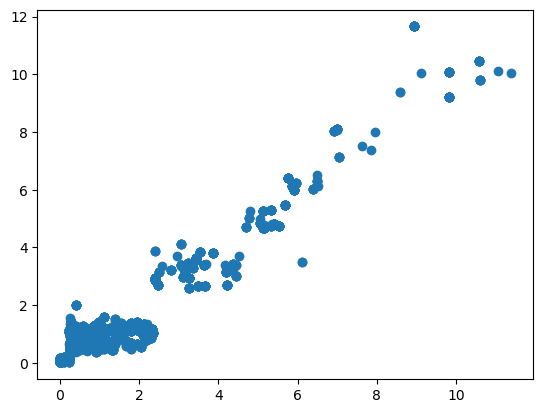

In [104]:
plt.scatter(y_test, y_pred)

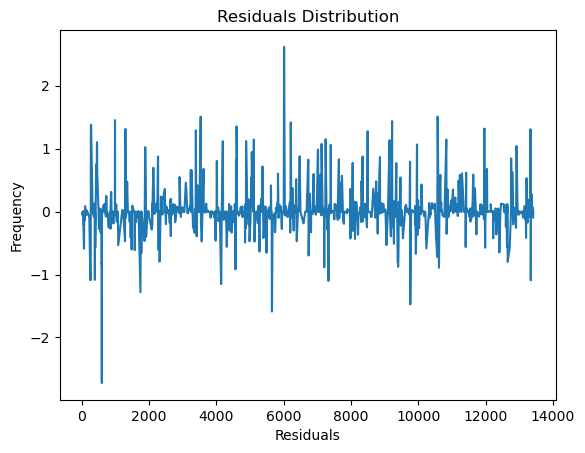

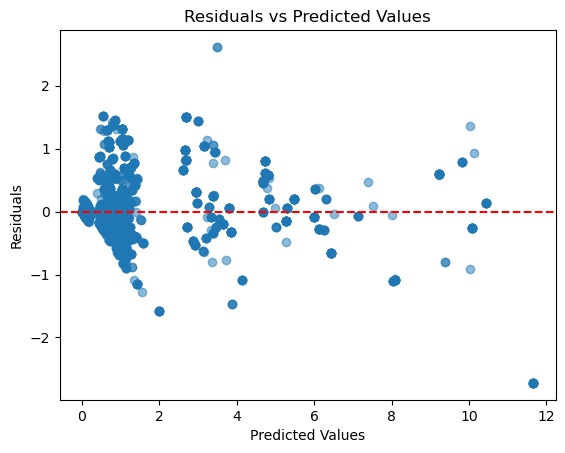

In [105]:
residuals = y_test - y_pred


plt.plot(residuals)
plt.title("Residuals Distribution")
plt.xlabel("Residuals")
plt.ylabel("Frequency")
plt.show()

plt.scatter(y_pred, residuals, alpha=0.5)
plt.axhline(0, color='red', linestyle='--')
plt.title("Residuals vs Predicted Values")
plt.xlabel("Predicted Values")
plt.ylabel("Residuals")
plt.show()